In [1]:
#!git clone https://github.com/MichalDanielDobrzanski/DeepLearningPython nn
%cd nn2

/Users/briantoone/Library/CloudStorage/GoogleDrive-kartoone76@gmail.com/My Drive/Colab Notebooks/nn2


In [2]:
%pwd

'/Users/briantoone/Library/CloudStorage/GoogleDrive-kartoone76@gmail.com/My Drive/Colab Notebooks/nn2'

In [3]:
# this code depends on having executed the previous cell
# (i.e., you need to have cloned the nn code and cd'ed into it)
import network
import mnist_loader
import numpy as np
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)
test_data = list(test_data)

# current shape is (10, 1)
print(np.shape(training_data[0][1]))
print(training_data[0][1])

def convertLabel(oldlabel):
    answer = np.argmax(oldlabel)
    binary_string = format(answer, '04b')[-4:]
    # Convert the binary string to a list of integers (digits)
    binary_list = [float(digit) for digit in binary_string]
    return np.reshape(binary_list,(4,1))

# preprocess all the training data so that it labels all images with binary answer
training_data = [(training_data[i][0], convertLabel(training_data[i][1])) for i in range(len(training_data))]
print(training_data[0][1])

(10, 1)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[0.]
 [1.]
 [0.]
 [1.]]


In [4]:
net = network.Network([784,30,4])
net.SGD(training_data, 30, 10, 3.0, test_data=test_data)

Epoch 0 : 8586 / 10000
Epoch 1 : 8767 / 10000
Epoch 2 : 8855 / 10000
Epoch 3 : 8959 / 10000
Epoch 4 : 8996 / 10000
Epoch 5 : 9033 / 10000
Epoch 6 : 9076 / 10000
Epoch 7 : 9085 / 10000
Epoch 8 : 9169 / 10000
Epoch 9 : 9114 / 10000
Epoch 10 : 9211 / 10000
Epoch 11 : 9138 / 10000
Epoch 12 : 9183 / 10000
Epoch 13 : 9209 / 10000
Epoch 14 : 9202 / 10000
Epoch 15 : 9199 / 10000
Epoch 16 : 9263 / 10000
Epoch 17 : 9201 / 10000
Epoch 18 : 9226 / 10000
Epoch 19 : 9272 / 10000
Epoch 20 : 9244 / 10000
Epoch 21 : 9229 / 10000
Epoch 22 : 9234 / 10000
Epoch 23 : 9242 / 10000
Epoch 24 : 9284 / 10000
Epoch 25 : 9234 / 10000
Epoch 26 : 9240 / 10000
Epoch 27 : 9223 / 10000
Epoch 28 : 9230 / 10000
Epoch 29 : 9252 / 10000


In [5]:
out0 = net.feedforward(training_data[0][0]) 
print(out0)
print(net.convertOutput(out0))

[[3.09038461e-08]
 [9.97454826e-01]
 [1.49905617e-01]
 [9.99999717e-01]]
5


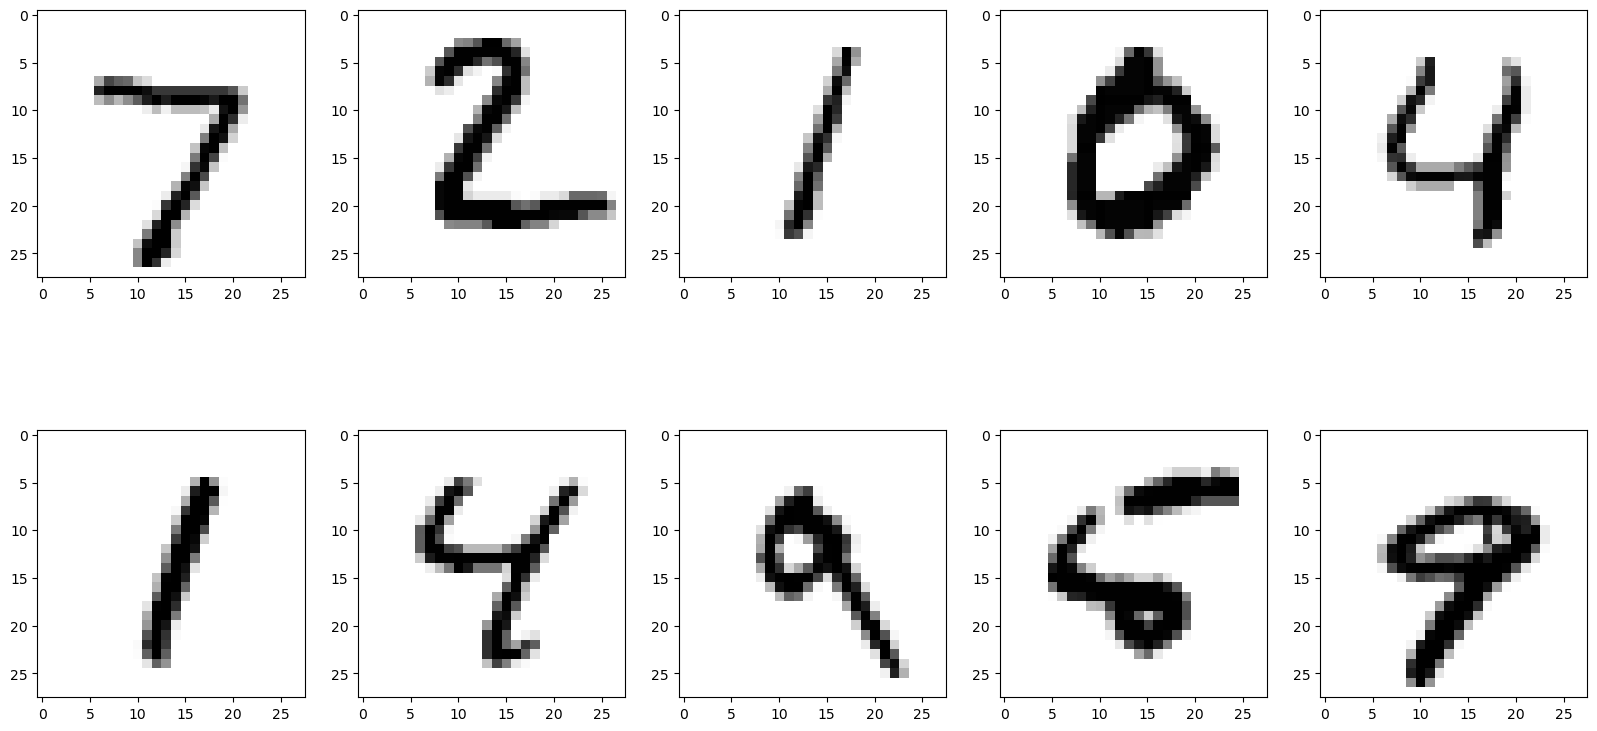

[array([[2.76588883e-13],
       [9.99995079e-01],
       [1.00000000e+00],
       [9.99999965e-01]]), 7, 7]
[array([[1.26344545e-05],
       [6.28599130e-04],
       [9.99997475e-01],
       [3.90413601e-03]]), 2, 2]
[array([[5.61004299e-04],
       [7.07076451e-04],
       [9.78675636e-07],
       [9.99964820e-01]]), 1, 1]
[array([[1.03105930e-03],
       [4.00488095e-06],
       [1.80653903e-05],
       [7.10756854e-07]]), 0, 0]
[array([[9.56653328e-05],
       [9.99947405e-01],
       [1.36749556e-06],
       [4.37921437e-07]]), 4, 4]
[array([[6.71890524e-04],
       [2.40898418e-04],
       [6.49981635e-06],
       [9.99904969e-01]]), 1, 1]
[array([[3.05511240e-04],
       [9.97137637e-01],
       [1.13488023e-04],
       [3.90561656e-09]]), 4, 4]
[array([[9.99779356e-01],
       [7.75026145e-06],
       [2.33386754e-02],
       [9.96306728e-01]]), 9, 9]
[array([[1.89759663e-09],
       [9.99998422e-01],
       [6.79541358e-01],
       [2.00934883e-03]]), 6, 5]
[array([[9.98871242

In [6]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 5, figsize=(20,10))
i = 0
for r in range(2):
  for c in range(5):
    test_img = np.reshape(test_data[i][0], (28,28))
    axs[r][c].imshow(test_img, cmap='gray_r', vmin=0, vmax=1)
    i += 1
plt.show()

# calculate the new BINARY 4-bit output being produced by our network
for i in range(10):
  a = net.feedforward(test_data[i][0])
  print([a, net.convertOutput(a), test_data[i][1]])

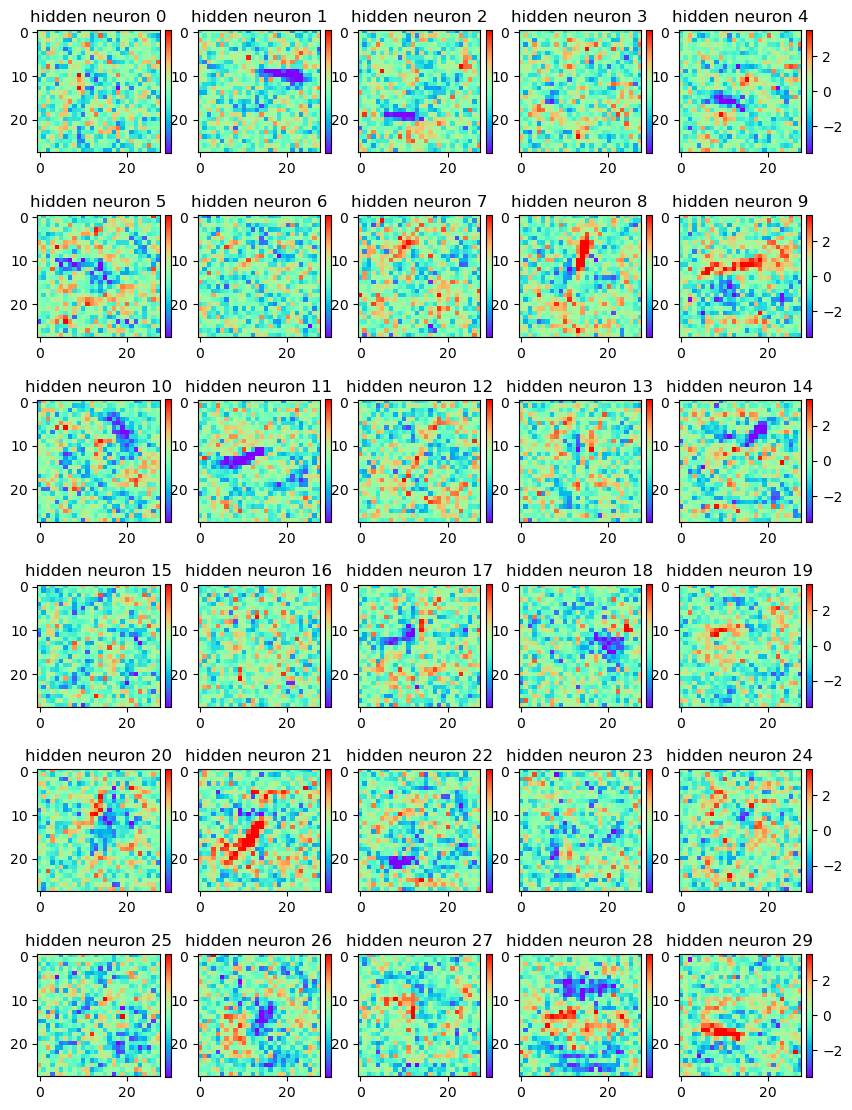

In [8]:
# now let's do this as a heatmap that maintains the 2d nature of the input pixels and plot ALL weights from the input layer to ALL 30 of the hidden neurons
xi = range(28)
yi = range(28)
fig,axes = plt.subplots(6, 5, figsize=(10,14))

i = 0
for r in range(6):
    for c in range(5):
        ax = axes[r][c]
        ax.set_title(f"hidden neuron {i}")
        zi = np.reshape(net.weights[0][i],(28,28))
        cax = ax.imshow(zi, cmap='rainbow', interpolation='nearest', origin="upper", vmin=-3.5, vmax=3.5)
        cb = fig.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)
        if c != 4:
          cb.set_ticks([])
        i += 1